## 1. Setup and Load Data

##### 1.1 Install Imports and Dependencies

In [17]:
# for import the TensorFlow library and make it as tf 
import matplotlib.pyplot as plt
import numpy as np 
import PIL
import tensorflow as tf
import cv2
# open source computer vision library and used for images and videos 
# for machine learning 
from tensorflow import keras 
from tensorflow.keras import layers, regularizers, callbacks
from tensorflow.keras.models import Sequential
from pathlib import Path


In [18]:
# just for check the version of TensorFlow
# just for check the OpenCV Version 
print("TensorFlow version:", tf.__version__)
print("OpenCV version:", cv2.__version__)

TensorFlow version: 2.18.0
OpenCV version: 4.10.0


In [19]:
%pip list

Package                   Version
------------------------- --------------
absl-py                   2.1.0
altair                    5.4.1
aniso8601                 9.0.1
anyio                     4.5.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
astunparse                1.6.3
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blinker                   1.9.0
cachetools                5.5.0
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.3.2
click                     8.1.7
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.3.0
cycler                    0.12.1
debugpy                   1.8.5
decorator                 5.1.1
defusedxml                0.7.1
dlib                      19.24.6
executing       

In [20]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [21]:
import os
import pathlib
import shutil
import matplotlib.image as mpimg

In [22]:
import shutil
from pathlib import Path

# Define the original dataset directory
backup_dataset_dir = Path('Potato Pest Dataset Backup')

# Define the new cleaned dataset directory
cleaned_dataset_dir = Path('Potato Pest Dataset Cleaned')

# Specify files to exclude (like .DS_Store or other unwanted files)
excluded_files = {'.DS_Store'}

# Create the cleaned dataset directory if it doesn't exist
cleaned_dataset_dir.mkdir(parents=True, exist_ok=True)

# List all subdirectories (classes), excluding hidden files like `.DS_Store`
folders = [folder for folder in backup_dataset_dir.iterdir() if folder.is_dir()]

# Iterate through each class folder
for class_folder in folders:
    # Create corresponding folder in cleaned dataset directory
    new_class_folder = cleaned_dataset_dir / class_folder.name
    new_class_folder.mkdir(parents=True, exist_ok=True)

    # Iterate through files in the current class folder
    for file in class_folder.iterdir():
        # If file is not in the excluded list, copy it to the cleaned directory
        if file.name not in excluded_files and file.is_file():
            # Copy the valid file to the new class folder
            shutil.copy(file, new_class_folder)

# Print the new path structure without the excluded files
for class_folder in cleaned_dataset_dir.iterdir():
    if class_folder.is_dir():
        files_in_class = [file.name for file in class_folder.iterdir()]
        print(f"Class '{class_folder.name}' has {len(files_in_class)} files after cleanup.")

Class 'SL01 Agrotis ipsilon (Hufnagel)' has 150 files after cleanup.
Class 'SL02 Amrasca devastans (Distant)' has 80 files after cleanup.
Class 'SL03 Aphis gossypii Glover' has 80 files after cleanup.
Class 'SL05 Bemisia tabaci (Gennadius)' has 70 files after cleanup.
Class 'SL06 Brachytrypes portentosus Lichtenstein' has 78 files after cleanup.
Class 'SL10 Epilachna vigintioctopunctata (Fabricius)' has 99 files after cleanup.
Class 'SL15 Myzus persicae (Sulzer)' has 100 files after cleanup.
Class 'SL17 Phthorimaea operculella (Zeller)' has 78 files after cleanup.


In [23]:
# Dictionary to store image count per class
class_counts = {}

total_images = sum(
    len([f for f in folder.glob('*') if f.is_file() and f.name not in excluded_files]) for folder in folders
)
print(f"Total images in original dataset: {total_images}""\n")

Total images in original dataset: 735



Class: SL01 Agrotis ipsilon (Hufnagel) - Jumlah Sampel: 150
-----------------------------------------------------


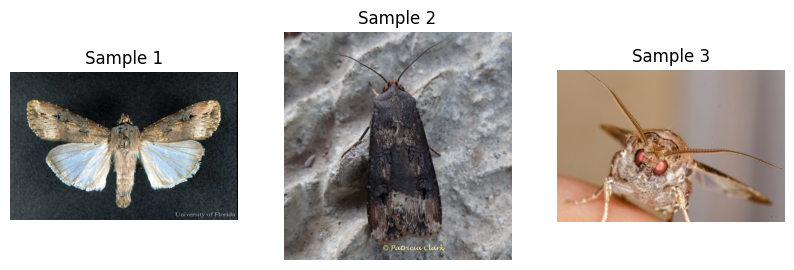



Class: SL02 Amrasca devastans (Distant) - Jumlah Sampel: 80
-----------------------------------------------------


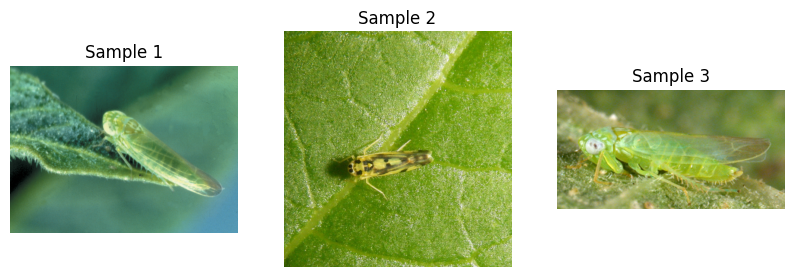



Class: SL03 Aphis gossypii Glover - Jumlah Sampel: 80
-----------------------------------------------------


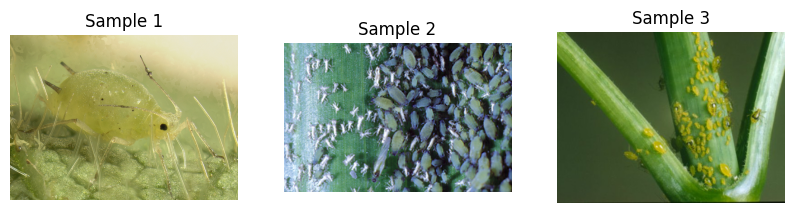



Class: SL05 Bemisia tabaci (Gennadius) - Jumlah Sampel: 70
-----------------------------------------------------


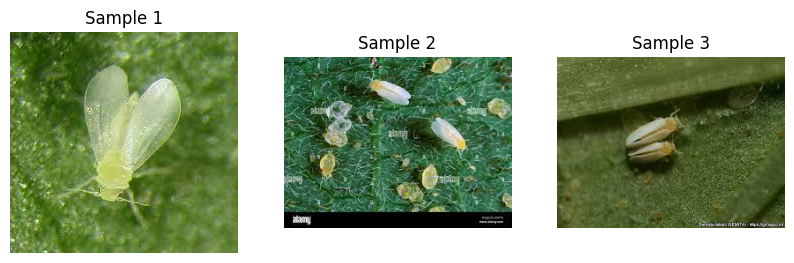



Class: SL06 Brachytrypes portentosus Lichtenstein - Jumlah Sampel: 78
-----------------------------------------------------


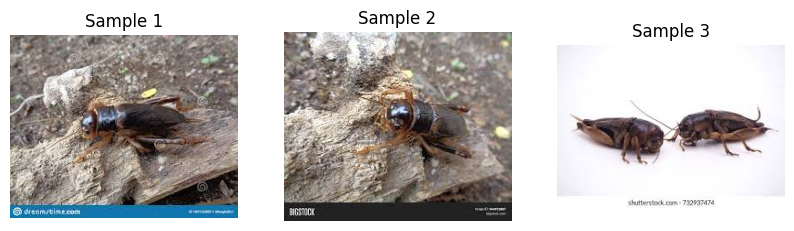



Class: SL10 Epilachna vigintioctopunctata (Fabricius) - Jumlah Sampel: 99
-----------------------------------------------------


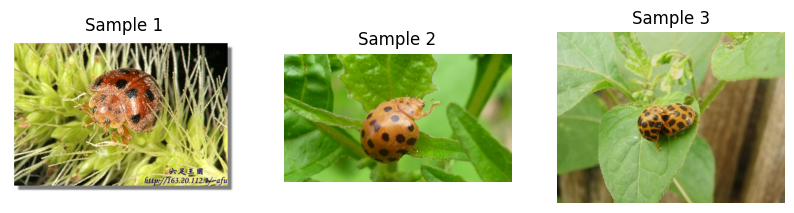



Class: SL15 Myzus persicae (Sulzer) - Jumlah Sampel: 100
-----------------------------------------------------


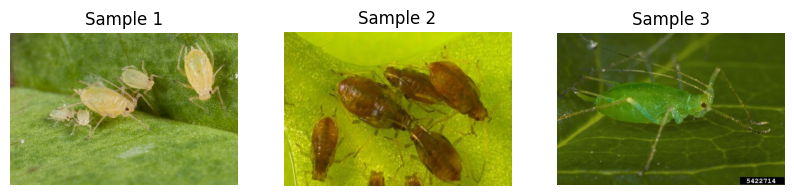



Class: SL17 Phthorimaea operculella (Zeller) - Jumlah Sampel: 78
-----------------------------------------------------


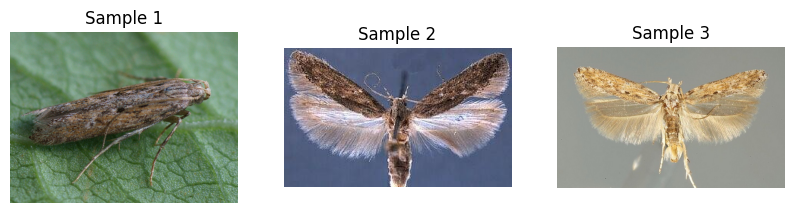

In [ ]:
# Loop through each class folder
for class_folder in folders:
    # Count the number of images in the current class folder
    num_images = len([
        file for file in class_folder.glob('*') 
        if file.is_file() and file.name not in excluded_files and file.name.lower() != '.ds_store'
    ])
    class_counts[class_folder.name] = num_images

    # Display some example images from each class
    print(f"Class: {class_folder.name} - Jumlah Sampel: {num_images}")
    print("-----------------------------------------------------")
    plt.figure(figsize=(10, 5))

    # Convert the generator to a list, filtering only files, and then slice it
    image_files = [
        file for file in class_folder.glob('*') 
        if file.is_file() and file.name.lower() != '.ds_store'
    ][:3]
    for i, image_file in enumerate(image_files):
        # Read and display the image using Matplotlib
        plt.subplot(1, 3, i + 1)
        image = mpimg.imread(str(image_file))  # Convert Path object to string
        plt.imshow(image)
        plt.title(f"Sample {i + 1}")
        plt.axis('off')  # Hide axes
    plt.show()
    print("\n")

In [25]:
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from pathlib import Path

data_dir = backup_dataset_dir

# List all subdirectories (classes), excluding hidden files like .DS_Store
folders = [
    folder for folder in data_dir.iterdir() 
    if folder.is_dir() and not folder.name.startswith('.')
]

num_classes = len(folders)
print(f"Number of classes: {num_classes}")
print("Class names:", [folder.name for folder in folders])

Number of classes: 8
Class names: ['SL01 Agrotis ipsilon (Hufnagel)', 'SL02 Amrasca devastans (Distant)', 'SL03 Aphis gossypii Glover', 'SL05 Bemisia tabaci (Gennadius)', 'SL06 Brachytrypes portentosus Lichtenstein', 'SL10 Epilachna vigintioctopunctata (Fabricius)', 'SL15 Myzus persicae (Sulzer)', 'SL17 Phthorimaea operculella (Zeller)']


In [26]:
import os
import imghdr
from sklearn.model_selection import train_test_split

# directory dataset 
# untuk splitting menggunakan original dataset 
dataset_dir = cleaned_dataset_dir

# classes 
classes = [
    'SL15 Myzus persicae (Sulzer)', 
    'SL17 Phthorimaea operculella (Zeller)', 
    'SL01 Agrotis ipsilon (Hufnagel)', 
    'SL05 Bemisia tabaci (Gennadius)', 
    'SL10 Epilachna vigintioctopunctata (Fabricius)', 
    'SL03 Aphis gossypii Glover', 
    'SL06 Brachytrypes portentosus Lichtenstein', 
    'SL02 Amrasca devastans (Distant)'
]

# Ratio train, validation, dan test sets
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1


# Loop tiap class
for class_name in classes:
    # path to the current class directory 
    class_dir = dataset_dir / class_name

    # List only valid image files in the class folder
    files = [f for f in class_dir.iterdir() if f.is_file() and f.name not in excluded_files ]

    # Split files into train, val, test sets
    # files is the input then devide by train_ratio 
    # train_files : 80% specified by train ratio 
    # 20% remaining the files will be used for val files and test files 
    train_files, remaining_files = train_test_split(files, train_size=train_ratio, random_state=42)

    # Second split: val (10%), test (10%)
    # train_size = 0.5 because 0.5 from remaining files
    val_files, test_files = train_test_split(remaining_files, train_size=0.5, random_state=42)

    # move file to new directories 
    # make new folser based on the name
    for folder_name, file_list in [("train", train_files), ("val", val_files), ("test", test_files)]: 
        folder_path = dataset_dir / folder_name / class_name
        folder_path.mkdir(parents=True, exist_ok=True)

        for file_path in file_list:
            print(f"Copy {file_path} to {folder_path}")
            shutil.copy(str(file_path), str(folder_path))

C:\Users\steve\AppData\Local\Temp\ipykernel_21552\365972504.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


Copy Potato Pest Dataset Cleaned\SL15 Myzus persicae (Sulzer)\Myzus persicae (Sulzer)_57.jpg to Potato Pest Dataset Cleaned\train\SL15 Myzus persicae (Sulzer)
Copy Potato Pest Dataset Cleaned\SL15 Myzus persicae (Sulzer)\Myzus persicae (Sulzer)_88.jpg to Potato Pest Dataset Cleaned\train\SL15 Myzus persicae (Sulzer)
Copy Potato Pest Dataset Cleaned\SL15 Myzus persicae (Sulzer)\Myzus persicae (Sulzer)_30.jpg to Potato Pest Dataset Cleaned\train\SL15 Myzus persicae (Sulzer)
Copy Potato Pest Dataset Cleaned\SL15 Myzus persicae (Sulzer)\Myzus persicae (Sulzer)_45.jpg to Potato Pest Dataset Cleaned\train\SL15 Myzus persicae (Sulzer)
Copy Potato Pest Dataset Cleaned\SL15 Myzus persicae (Sulzer)\Myzus persicae (Sulzer)_7.jpg to Potato Pest Dataset Cleaned\train\SL15 Myzus persicae (Sulzer)
Copy Potato Pest Dataset Cleaned\SL15 Myzus persicae (Sulzer)\Myzus persicae (Sulzer)_20.jpg to Potato Pest Dataset Cleaned\train\SL15 Myzus persicae (Sulzer)
Copy Potato Pest Dataset Cleaned\SL15 Myzus per

## Create Dataset 

In [27]:
batch_size = 32 
img_height = 180
img_width = 180 
buffer_size = 1000

In [28]:
train_dir = os.path.join(dataset_dir, "train")
val_dir = os.path.join(dataset_dir, "val")
test_dir = os.path.join(dataset_dir, "test")

# Load datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 587 files belonging to 8 classes.
Found 74 files belonging to 8 classes.
Found 74 files belonging to 8 classes.


In [29]:
AUTOTUNE = tf.data.AUTOTUNE 

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(img_height, img_width), 
    layers.Rescaling(1./255)
])

def prepare(dataset, shuffle=False, training=False):
    dataset = dataset.map(lambda x, y: (resize_and_rescale(x), y), num_parallel_calls=AUTOTUNE)
    if shuffle:
        dataset = dataset.shuffle(buffer_size)
    return dataset.prefetch(buffer_size=AUTOTUNE)

train_ds = prepare(train_ds, shuffle=True, training=True)
val_ds = prepare(val_ds)

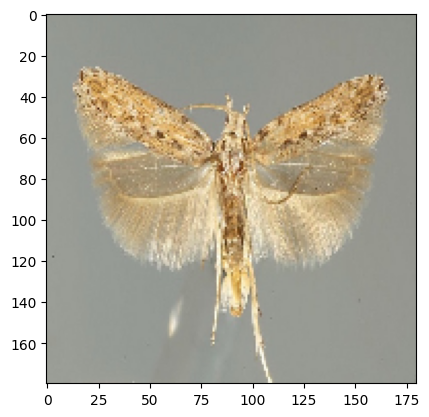

In [30]:
resize_image = resize_and_rescale(np.expand_dims(image, axis=0))
_ = plt.imshow(resize_image[0])
plt.show()

## Train model 

In [31]:
image_extensions = [".png", ".jpg", ".jpeg"]

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")


model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(img_height, img_width, 3)), 
    tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(256, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(512, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(8, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=optimizer, 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
    metrics=['accuracy']
)

In [32]:
epochs = 20

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 17s 768ms/step - accuracy: 0.1339 - loss: 3.1854 - val_accuracy: 0.2432 - val_loss: 2.3856
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 754ms/step - accuracy: 0.2433 - loss: 2.3055 - val_accuracy: 0.1351 - val_loss: 2.2922
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 794ms/step - accuracy: 0.1961 - loss: 2.2621 - val_accuracy: 0.3243 - val_loss: 1.9091
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 761ms/step - accuracy: 0.3795 - loss: 1.9070 - val_accuracy: 0.2568 - val_loss: 1.8409
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 783ms/step - accuracy: 0.3863 - loss: 1.8671 - val_accuracy: 0.4324 - val_loss: 1.6808
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 14s 746ms/step - accuracy: 0.4018 - loss: 1.7000 - val_accuracy: 0.4189 - val_loss: 1.5832
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 14s 748ms/step - accuracy: 0.4746 - loss: 1.6204 - val_accuracy: 0.4865 - val_loss: 1.4970
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 14s 742ms/step - accuracy: 0.4945 - loss: 1.4892 - val_accu

In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    21,234,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         4,104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,367,770 (260.80 MB)

 Trainable params: 22,789,256 (86.93 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 45,578,514 (173.87 MB)

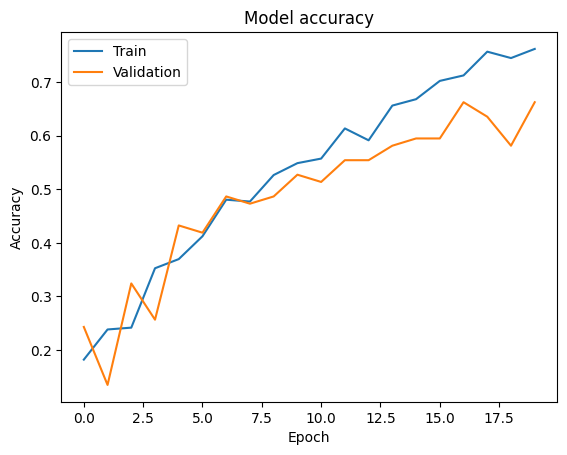

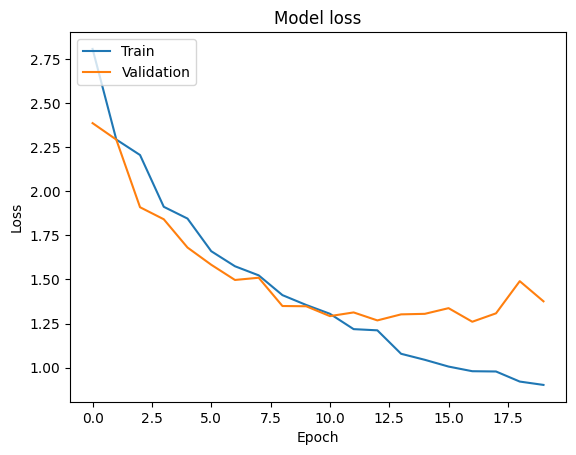

In [34]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Data Augmentation

In [35]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.3),
  ]
)

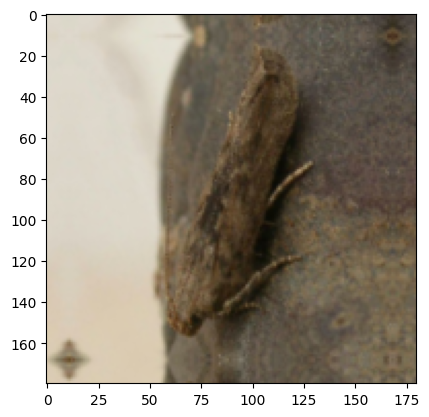

In [36]:
# Apply data augmentation to a batch of images
image_batch, label_batch = next(iter(train_ds))
augmented_images = data_augmentation(image_batch)

# Display the first image in the batch
plt.imshow(augmented_images[0].numpy())
plt.show()

In [37]:
image_extensions = [".png", ".jpg", ".jpeg"]

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")


model = tf.keras.Sequential([
    data_augmentation,
    # tf.keras.layers.Resizing(img_height, img_width),
    # tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(256, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Conv2D(512, kernel_size=3, activation='relu'),
    # tf.keras.layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(8, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=optimizer, 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    metrics=['accuracy'], 
)

In [38]:
epochs = 70

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/70


c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


19/19 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.1479 - loss: 4.2052 - val_accuracy: 0.2027 - val_loss: 2.0562
Epoch 2/70
19/19 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.1952 - loss: 2.0313 - val_accuracy: 0.2162 - val_loss: 1.8901
Epoch 3/70
19/19 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.2903 - loss: 1.8308 - val_accuracy: 0.3243 - val_loss: 1.6840
Epoch 4/70
19/19 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.3053 - loss: 1.7650 - val_accuracy: 0.3514 - val_loss: 1.5726
Epoch 5/70
19/19 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.3921 - loss: 1.6189 - val_accuracy: 0.2703 - val_loss: 1.4521
Epoch 6/70
19/19 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.4257 - loss: 1.5172 - val_accuracy: 0.4054 - val_loss: 1.4202
Epoch 7/70
19/19 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.4098 - loss: 1.5337 - val_accuracy: 0.4459 - val_loss: 1.3012
Epoch 8/70
19/19 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.4478 - loss: 1.5225 - val_accuracy: 0.4459 - val_loss: 1.3064
Epo

KeyboardInterrupt: 

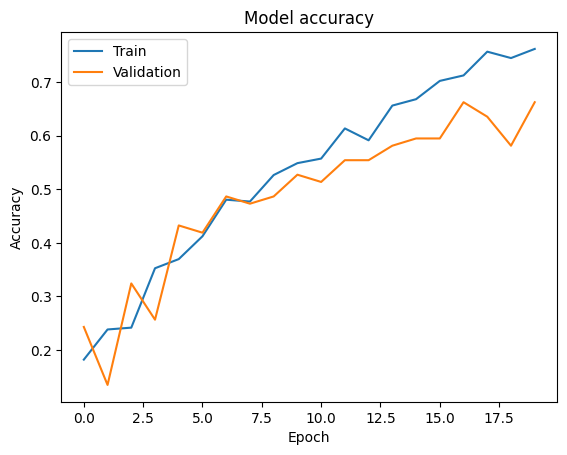

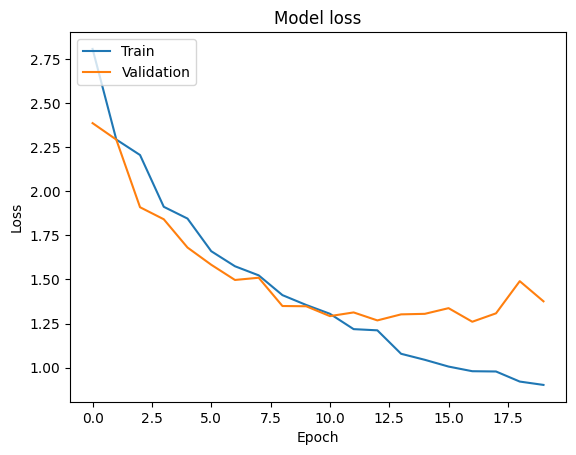

In [39]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# model.evaluate(test_ds)

In [40]:
model.save('model.h5')